## Observations and Insights 

In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_dataset = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [178]:
# Checking the number of mice.
mice_count = len(mouse_study_dataset["Mouse ID"].unique())

print(f"Total number of mice in this study is: ")
mice_count

Total number of mice in this study is: 


249

In [179]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_dataset.loc[mouse_study_dataset.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()

#confirm validity
test = [mouse_study_dataset["Mouse ID"]== 'g989'] 

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset = mouse_study_dataset[mouse_study_dataset["Mouse ID"].isin(duplicates) == False]

clean_dataset.round(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [180]:
# Checking the number of mice in the clean DataFrame.

mice_count2 = len(clean_dataset["Mouse ID"].unique())

print(f"Total number of mice in this study is: ")
mice_count2


Total number of mice in this study is: 


248

## Summary Statistics

In [181]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Dv": standard_dv, "SEM": sem})

#Format

summary_stats = summary_stats.round(2)

summary_stats


,Mean,Median,Variance,Standard Dv,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [182]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_regimen = pd.DataFrame(clean_dataset.groupby(["Drug Regimen"]).count()).reset_index()

#Alter the dataframe down to two columns
drugs_dframe = drug_regimen[["Drug Regimen", "Mouse ID"]]
drugs_dframe = drugs_dframe.set_index("Drug Regimen")


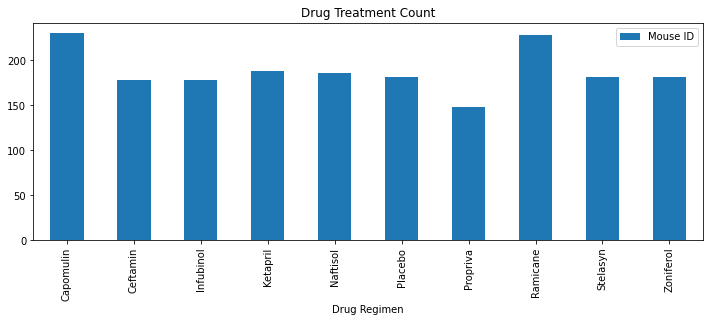

<Figure size 432x288 with 0 Axes>

In [183]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs_dframe.plot(kind="bar", figsize=(12,4))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()



In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(clean_dataset.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [185]:
#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,922
1,Male,958


Text(0, 0.5, '')

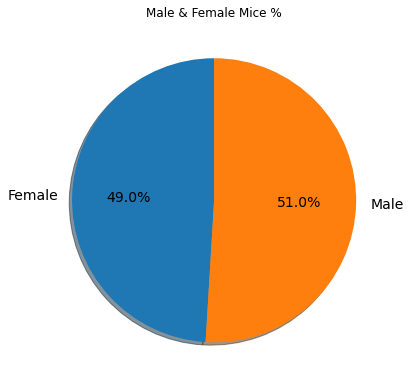

In [186]:
# pie plot using pandas

plt.figure(figsize=(14,8))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=90, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice %")
plt.xlabel("")
plt.ylabel("")


In [187]:
plt.clf()
plt.cla()
plt.close()

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (clean_dataset.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[922, 958]

In [189]:
 #Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["yellow", "green"]
explode = (0.1, 0)

(-1.2128639238082213,
 1.1091177556002698,
 -1.106700641755685,
 1.1034697461867102)

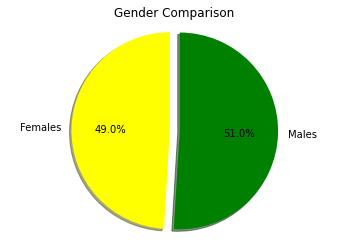

In [190]:
#creating the pie chart
plt.title("Gender Comparison")
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

In [191]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [192]:
# Start by getting the last (greatest) timepoint for each mouse

caplast = clean_dataset.groupby('Mouse ID').max().reset_index()

caplastmerge = caplast[["Mouse ID","Timepoint"]].merge(clean_dataset, on=["Mouse ID","Timepoint"], how='left')

caplastmerge.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [193]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tvalue_cap = caplastmerge.loc[caplastmerge["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
tvalue_ram = caplastmerge.loc[caplastmerge["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
tvalue_inf = caplastmerge.loc[caplastmerge["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
tvalue_ceft = caplastmerge.loc[caplastmerge["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']


# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capamulin

quartiles = tvalue_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {round(lower_bound, 2)}") 
print(f"Capomulin potential outliers could be values above {round(upper_bound, 2)}")

Capomulin potential outliers could be values below 20.7
Capomulin potential outliers could be values above 51.83


In [194]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Ramicane

quartiles = tvalue_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane potential outliers could be values below {round(lower_bound, 2)}") 
print(f"Ramicane potential outliers could be values above {round(upper_bound, 2)}")

Ramicane potential outliers could be values below 17.91
Ramicane potential outliers could be values above 54.31


In [195]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Infubinol

quartiles = tvalue_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {round(lower_bound, 2)}") 
print(f"Infubinol potential outliers could be values above {round(upper_bound, 2)}")

Infubinol potential outliers could be values below 36.83
Infubinol potential outliers could be values above 82.74


In [196]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Ceftamin

quartiles = tvalue_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {round(lower_bound, 2)}") 
print(f"Ceftamin potential outliers could be values above {round(upper_bound, 2)} could be outliers.")

Ceftamin potential outliers could be values below 25.36
Ceftamin potential outliers could be values above 87.67 could be outliers.


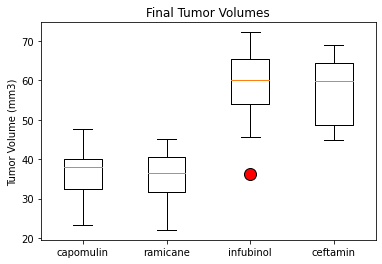

In [197]:
 # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
plt.boxplot([tvalue_cap,tvalue_ram, tvalue_inf, tvalue_ceft], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

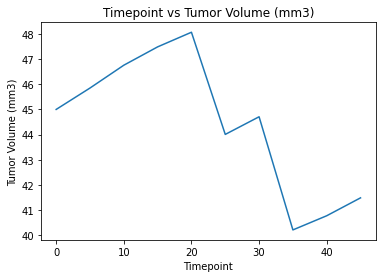

In [198]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_table = clean_dataset.loc[clean_dataset['Drug Regimen'] == 'Capomulin']
mouse = clean_dataset.loc[clean_dataset['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

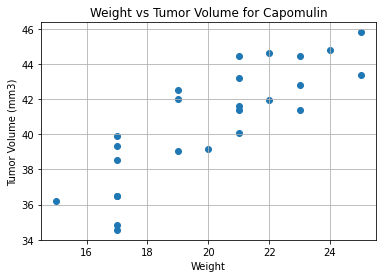

In [199]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_mweight= clean_dataset.loc[clean_dataset['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_mweight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.grid()
plt.show()


In [200]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

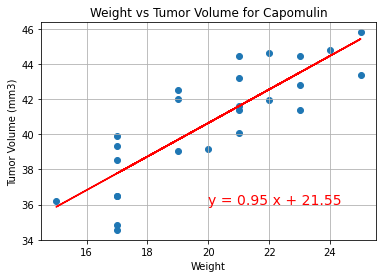

The correlation between both factors is 0.84


In [206]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.grid()
plt.show()

print(f"The correlation between both factors is {round(rvalue,2)}")

In [207]:
plt.clf()
plt.cla()
plt.close()